### Import your librares

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

### Load your dataset

In [2]:
WeatherData = pd.read_csv('seattle_weather.csv')

### Repeat the following steps for each column within outliers

* Visualize the outliers
* Detect if your data set contains any outliers
* Identify lower & higher limit of outliers
* Drop all outliers
* Visualize the column after processing


In [3]:
WeatherData.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


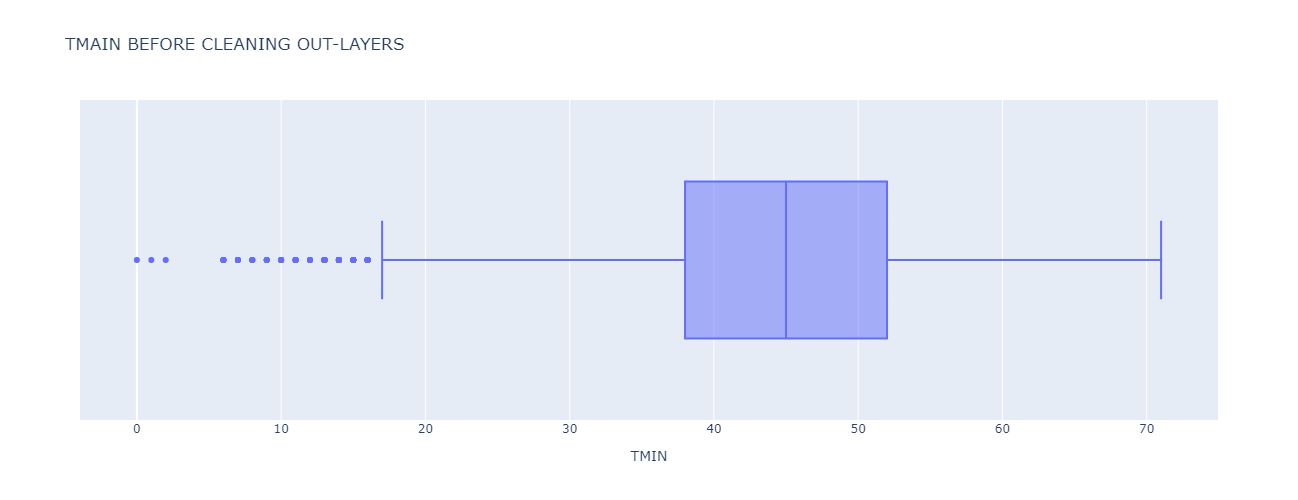

In [30]:
fig = px.box(WeatherData, x='TMIN', height=500, title='TMAIN BEFORE CLEANING OUT-LAYERS')
fig.show()

In [56]:
# Calculate Q1 and Q3 using precentile func.
Q1, Q3 = np.percentile(WeatherData['TMIN'], [25,75], method='midpoint')
# Calculate IQR 
IQR = Q3 - Q1
# Finding the Upper limit
Upper = Q3 + (1.5*IQR)
#Finding the Lower limit
Lower = Q1 - (1.5*IQR)
# Drop Out-Layers
CleanedTminWD = WeatherData.where((WeatherData['TMIN'] <= Upper) & (WeatherData['TMIN'] >= Lower))
print(Q1, Q3, IQR, Upper, Lower)

38.0 52.0 14.0 73.0 17.0


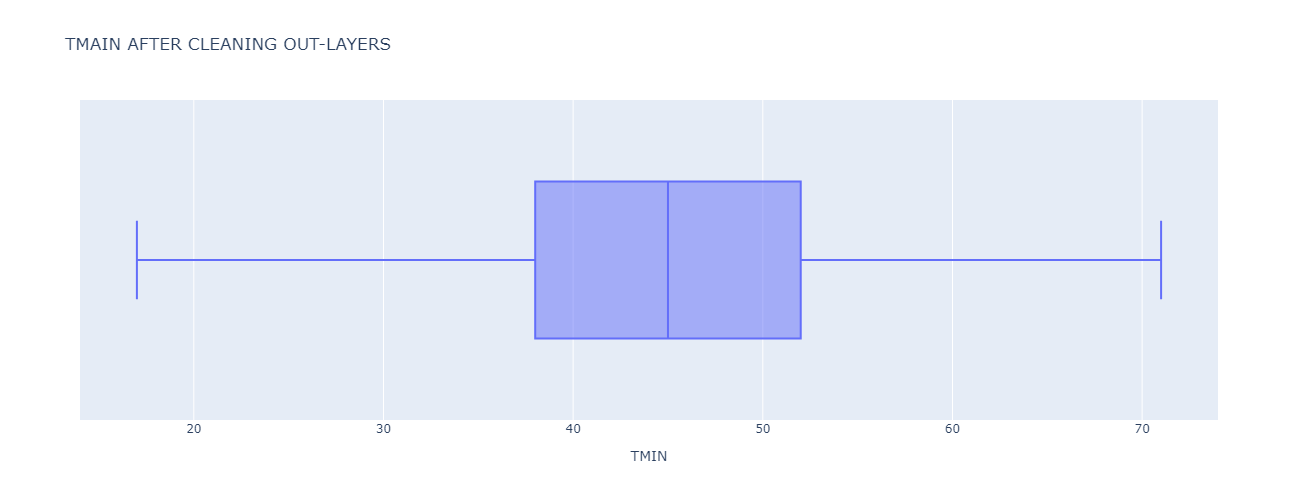

In [58]:
fig = px.box(CleanedTminWD, x='TMIN', height=500, title='TMAIN AFTER CLEANING OUT-LAYERS')
fig.show()

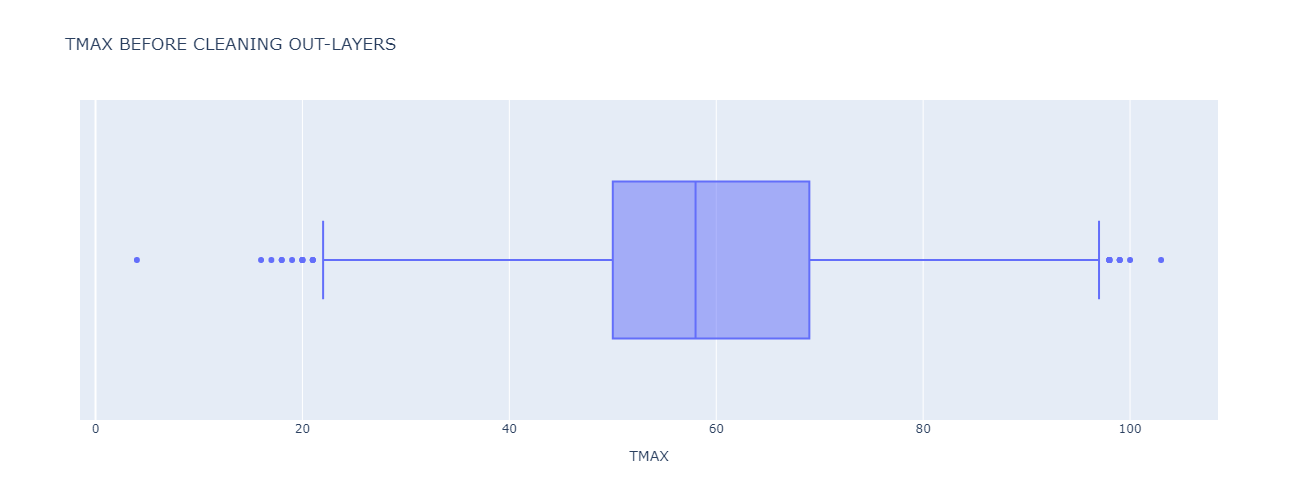

In [59]:
fig = px.box(WeatherData, x='TMAX', height=500, title='TMAX BEFORE CLEANING OUT-LAYERS')
fig.show()

In [61]:
# Calculate Q1 and Q3 using precentile func.
Q1, Q3 = np.percentile(WeatherData['TMAX'], [25,75], method='midpoint')
# Calculate IQR 
IQR = Q3 - Q1
# Finding the Upper limit
Upper = Q3 + (1.5*IQR)
#Finding the Lower limit
Lower = Q1 - (1.5*IQR)
# Drop Out-Layers
CleanedTmaxWD = WeatherData.where((WeatherData['TMAX'] <= Upper) & (WeatherData['TMAX'] >= Lower))
print(Q1, Q3, IQR, Upper, Lower)

50.0 69.0 19.0 97.5 21.5


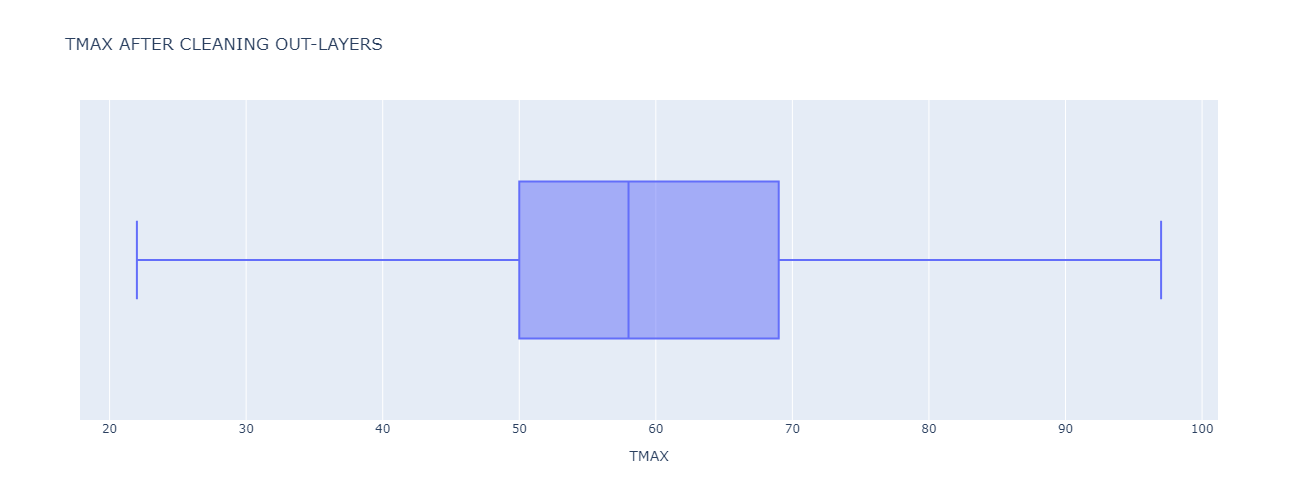

In [62]:
fig = px.box(CleanedTmaxWD, x='TMAX', height=500, title='TMAX AFTER CLEANING OUT-LAYERS')
fig.show()

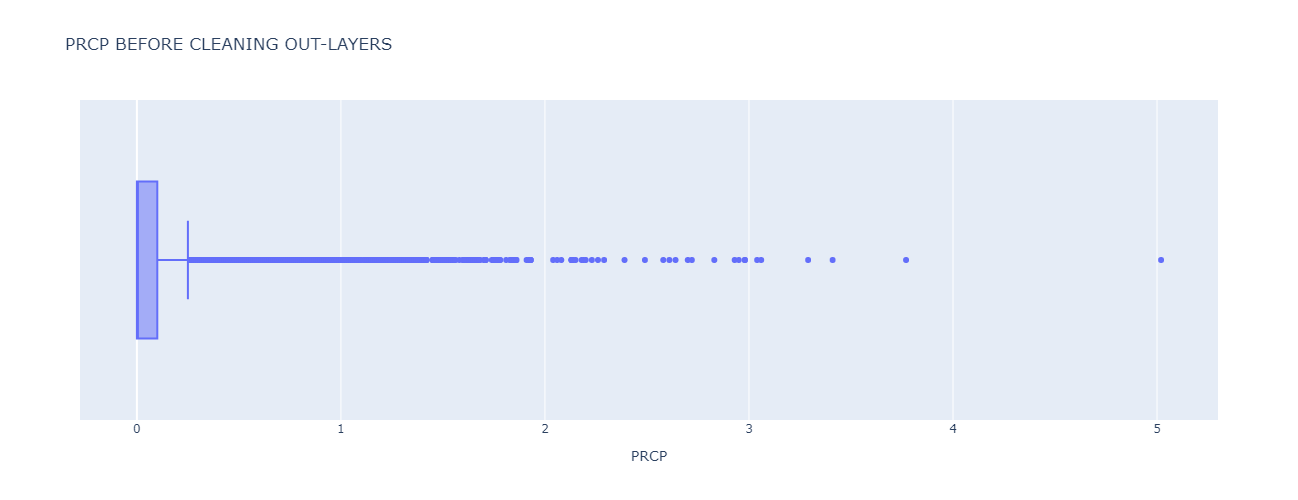

In [63]:
fig = px.box(WeatherData, x='PRCP', height=500, title='PRCP BEFORE CLEANING OUT-LAYERS')
fig.show()

#### NOTE:
**PCRP Column does not need to be cleaned from out-layers, Since the data has SMALL VARIANCE.**